In [1]:
import tensorflow as tf
import os
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
import pandas as pd
import random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
IMAGE_DIR = 'images'


In [4]:
bird_files = tf.data.Dataset.list_files(IMAGE_DIR + '/bird/birds/*')
cat_files = tf.data.Dataset.list_files(IMAGE_DIR + '/cat/cats/*')
deer_files = tf.data.Dataset.list_files(IMAGE_DIR + '/deer/deers/*')
dog_files = tf.data.Dataset.list_files(IMAGE_DIR + '/dog/dogs/*')
rabbit_files = tf.data.Dataset.list_files(IMAGE_DIR + '/rabbit/rabbits/*')
raccoon_files = tf.data.Dataset.list_files(IMAGE_DIR + '/raccoon/raccoons/*')
squirrel_files = tf.data.Dataset.list_files(IMAGE_DIR + '/squirrel/squirrels/*')

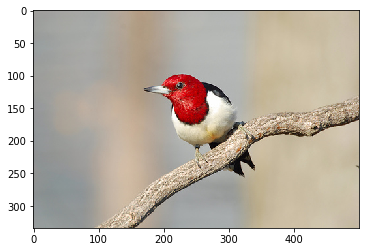

In [5]:
#example file
for i in bird_files.take(1):
    img = load_img(i.numpy())
    plt.imshow(img)
    plt.show() 

In [6]:
def load_image(filename_tensor):
    img = tf.io.read_file(filename_tensor)
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    return img
bird_imgs = bird_files.map(load_image)
cat_imgs = cat_files.map(load_image)
deer_imgs = deer_files.map(load_image)
dog_imgs = dog_files.map(load_image)
rabbit_imgs = rabbit_files.map(load_image)
raccoon_imgs = raccoon_files.map(load_image)
squirrel_imgs = squirrel_files.map(load_image)


tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [7]:
#LABELs
#bird =0
#cat=1
#deer=2
#dog=3
#rabbit=4
#raccoon=5
#squirrel=6
bird_ds = np.array([np.array([f.numpy(),0]) for f in bird_imgs])
cat_ds = np.array([np.array([f.numpy(),1]) for f in cat_imgs])
deer_ds = np.array([np.array([f.numpy(),2]) for f in deer_imgs])
dog_ds = np.array([np.array([f.numpy(),3]) for f in dog_imgs])
rabbit_ds = np.array([np.array([f.numpy(),4]) for f in rabbit_imgs])
raccoon_ds = np.array([np.array([f.numpy(),5]) for f in raccoon_imgs])
squirrel_ds = np.array([np.array([f.numpy(),6]) for f in squirrel_imgs])

In [9]:
#can skip
np.random.seed(42)
np.random.shuffle(bird_ds)
np.random.shuffle(cat_ds)
np.random.shuffle(deer_ds)
np.random.shuffle(dog_ds)
np.random.shuffle(rabbit_ds)
np.random.shuffle(raccoon_ds)
np.random.shuffle(squirrel_ds)


In [8]:
#split images into trainin and test dataset
bird_train,bird_test = train_test_split(bird_ds,test_size=0.20,random_state = 42)
cat_train,cat_test = train_test_split(cat_ds,test_size=0.20,random_state = 42)
deer_train,deer_test = train_test_split(deer_ds,test_size=0.20,random_state = 42)
dog_train,dog_test = train_test_split(dog_ds,test_size=0.20,random_state = 42)
rabbit_train,rabbit_test = train_test_split(rabbit_ds,test_size=0.20,random_state = 42)
raccoon_train,raccoon_test = train_test_split(raccoon_ds,test_size=0.20,random_state = 42)
squirrel_train,squirrel_test = train_test_split(squirrel_ds,test_size=0.20,random_state = 42)


In [9]:
train_data = np.concatenate((bird_train,cat_train,
                            deer_train,dog_train,
                            rabbit_train,raccoon_train,
                            squirrel_train))
test_data =np.concatenate((bird_test,cat_test,
                            deer_test,dog_test,
                            rabbit_test,raccoon_test,
                            squirrel_test))

In [10]:
np.random.shuffle(train_data)
np.random.shuffle(test_data)

train_X = np.array([x[0] for x in train_data])
train_y = np.array([y[1] for y in train_data])

test_X = np.array([x[0] for x in test_data])
test_y = np.array([y[1] for y in test_data])

In [11]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(6998, 128, 128, 3)
(6998,)
(1752, 128, 128, 3)
(1752,)


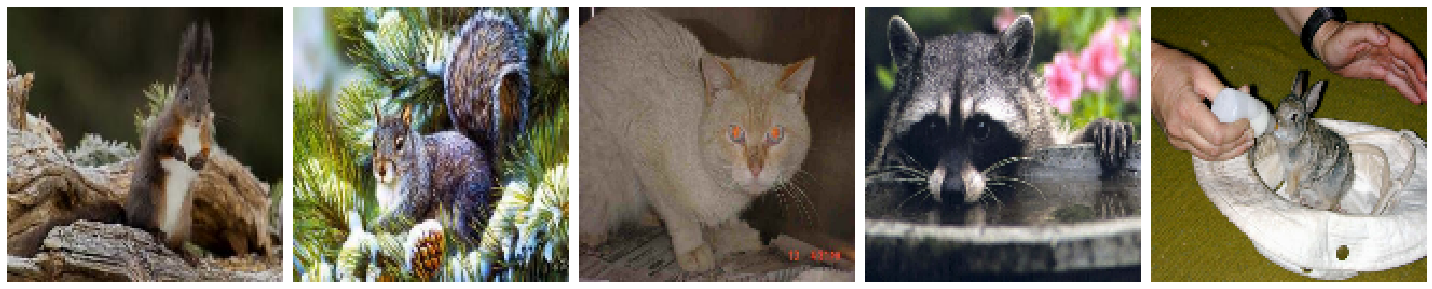

In [57]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(np.squeeze(img))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
#Sample images after processings
plotImages(train_X[:5])

In [13]:
print(train_y[:5])

[6 6 1 5 4]


In [58]:
cnn_clf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')])

cnn_clf.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_clf.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_53 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 61, 61, 128)       36992     
_________________________________________________________________
batch_normalization_54 (Batc (None, 61, 61, 128)       512       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 30, 30, 128)     

In [59]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)

EPOCHS = 10
cnn_history = cnn_clf.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=EPOCHS,
    #callbacks=[earlystop]
    )

Train on 5598 samples, validate on 1400 samples
Epoch 1/10
5598/5598 [==============================] - 138s 25ms/sample - loss: 1.9516 - accuracy: 0.3608 - val_loss: 2.7959 - val_accuracy: 0.1679
Epoch 2/10
5598/5598 [==============================] - 137s 24ms/sample - loss: 1.4191 - accuracy: 0.5046 - val_loss: 2.1317 - val_accuracy: 0.2450
Epoch 3/10
5598/5598 [==============================] - 135s 24ms/sample - loss: 1.1766 - accuracy: 0.5804 - val_loss: 1.8791 - val_accuracy: 0.3721
Epoch 4/10
5598/5598 [==============================] - 139s 25ms/sample - loss: 0.9822 - accuracy: 0.6395 - val_loss: 1.1359 - val_accuracy: 0.5736
Epoch 5/10
5598/5598 [==============================] - 136s 24ms/sample - loss: 0.7520 - accuracy: 0.7329 - val_loss: 2.4240 - val_accuracy: 0.3771
Epoch 6/10
5598/5598 [==============================] - 135s 24ms/sample - loss: 0.5961 - accuracy: 0.7883 - val_loss: 1.3805 - val_accuracy: 0.5793
Epoch 7/10
5598/5598 [==============================] - 13

In [60]:
res = cnn_clf.evaluate(test_X,test_y,verbose=2)
print(res)

1752/1 - 16s - loss: 1.4460 - accuracy: 0.6998
[0.9926940278919865, 0.6997717]


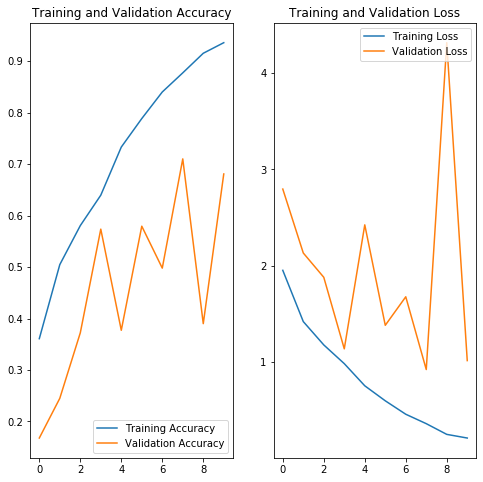

In [62]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']

loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()